In [3]:
import pandas as pd
import numpy as np

# Pandas = for data handling
# NumPy = for numeric operations

df = pd.read_csv('saas_user_data.csv')
# This loads your data into a structured table called a DataFrame (df)

df.head()
# Helps you quickly see what kind of data you're working with


,user_id,signup_date,last_login_date,logins,avg_session_time_mins,feature_usage_count,upgraded,upgrade_date,churn_flag
0,user_1,13-04-2023,05-09-2023,7,13.79,7,1,16-07-2023,0
1,user_2,15-12-2023,17-03-2024,10,19.70,1,0,NaN,0
2,user_3,28-09-2023,29-11-2023,4,17.62,6,0,NaN,0
3,user_4,17-04-2023,09-07-2023,6,16.23,2,0,NaN,1
4,user_5,13-03-2023,06-04-2023,6,16.43,6,0,NaN,1


In [11]:
df.info()
# - Tells you if columns are numbers, text, or dates
# - Shows if any columns have missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10000 non-null  object 
 1   signup_date            10000 non-null  object 
 2   last_login_date        10000 non-null  object 
 3   logins                 10000 non-null  int64  
 4   avg_session_time_mins  10000 non-null  float64
 5   feature_usage_count    10000 non-null  int64  
 6   upgraded               10000 non-null  int64  
 7   upgrade_date           5022 non-null   object 
 8   churn_flag             10000 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 703.3+ KB


In [12]:
df.isnull().sum()
# Tells you which columns need fixing or cleaning.
# `upgrade_date` will have missing values for users who never upgraded — that’s normal.

user_id                     0
signup_date                 0
last_login_date             0
logins                      0
avg_session_time_mins       0
feature_usage_count         0
upgraded                    0
upgrade_date             4978
churn_flag                  0
dtype: int64

In [14]:
# Convert dates with dayfirst format
df['signup_date'] = pd.to_datetime(df['signup_date'], dayfirst=True)
df['last_login_date'] = pd.to_datetime(df['last_login_date'], dayfirst=True)
df['upgrade_date'] = pd.to_datetime(df['upgrade_date'], dayfirst=True, errors='coerce')

In [15]:
df.duplicated().sum()
# Duplicates can mess up your analysis. If you find any, remove them with df.drop_duplicates()

np.int64(0)

In [16]:
df.describe()
# Helps you understand ranges, averages, and spot outliers


,signup_date,last_login_date,logins,avg_session_time_mins,feature_usage_count,upgraded,upgrade_date,churn_flag
count,10000,10000,10000.000000,10000.000000,10000.000000,10000.00000,5022,10000.000000
mean,2023-07-01 10:03:47.519999744,2023-09-28 01:26:24,10.021500,15.007364,5.000700,0.50220,2023-09-04 15:06:05.591398144,0.258400
min,2023-01-01 00:00:00,2023-01-04 00:00:00,0.000000,1.000000,0.000000,0.00000,2023-01-10 00:00:00,0.000000
25%,2023-04-03 00:00:00,2023-06-29 00:00:00,8.000000,11.650000,3.000000,0.00000,2023-06-07 00:00:00,0.000000
50%,2023-06-30 00:00:00,2023-09-28 00:00:00,10.000000,15.000000,5.000000,1.00000,2023-09-06 12:00:00,0.000000
75%,2023-10-01 00:00:00,2023-12-27 00:00:00,12.000000,18.330000,6.000000,1.00000,2023-12-04 00:00:00,1.000000
max,2023-12-31 00:00:00,2024-06-27 00:00:00,23.000000,35.500000,17.000000,1.00000,2024-04-27 00:00:00,1.000000
std,NaN,NaN,3.176169,5.011602,2.253798,0.50002,NaN,0.437777


In [17]:
df.describe(include='object')   # For strings
df.describe(include='all')      # For everything

,user_id,signup_date,last_login_date,logins,avg_session_time_mins,feature_usage_count,upgraded,upgrade_date,churn_flag
count,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.00000,5022,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,user_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2023-07-01 10:03:47.519999744,2023-09-28 01:26:24,10.021500,15.007364,5.000700,0.50220,2023-09-04 15:06:05.591398144,0.258400
min,NaN,2023-01-01 00:00:00,2023-01-04 00:00:00,0.000000,1.000000,0.000000,0.00000,2023-01-10 00:00:00,0.000000
25%,NaN,2023-04-03 00:00:00,2023-06-29 00:00:00,8.000000,11.650000,3.000000,0.00000,2023-06-07 00:00:00,0.000000
50%,NaN,2023-06-30 00:00:00,2023-09-28 00:00:00,10.000000,15.000000,5.000000,1.00000,2023-09-06 12:00:00,0.000000
75%,NaN,2023-10-01 00:00:00,2023-12-27 00:00:00,12.000000,18.330000,6.000000,1.00000,2023-12-04 00:00:00,1.000000
max,NaN,2023-12-31 00:00:00,2024-06-27 00:00:00,23.000000,35.500000,17.000000,1.00000,2024-04-27 00:00:00,1.000000


In [18]:
df['upgraded'].value_counts()

# Tells you how many users converted to paid plan — very important business insight

upgraded
1    5022
0    4978
Name: count, dtype: int64

In [19]:

df['churn_flag'].value_counts()

# Knowing churn rate is crucial for SaaS companies to fix user drop-off

churn_flag
0    7416
1    2584
Name: count, dtype: int64

In [23]:
df['days_active'] = (df['last_login_date'] - df['signup_date']).dt.days

# This helps you understand how long each user stayed active

In [24]:
df['days_to_upgrade'] = (df['upgrade_date'] - df['signup_date']).dt.days
#  Create new column for days until upgrade (only for upgraded users)
# Companies want to know: “When do most users upgrade?”

In [4]:
df.head()
# See if your new columns look correct and ready for deeper analysis.

,user_id,signup_date,last_login_date,logins,avg_session_time_mins,feature_usage_count,upgraded,upgrade_date,churn_flag
0,user_1,13-04-2023,05-09-2023,7,13.79,7,1,16-07-2023,0
1,user_2,15-12-2023,17-03-2024,10,19.70,1,0,NaN,0
2,user_3,28-09-2023,29-11-2023,4,17.62,6,0,NaN,0
3,user_4,17-04-2023,09-07-2023,6,16.23,2,0,NaN,1
4,user_5,13-03-2023,06-04-2023,6,16.43,6,0,NaN,1


In [20]:
## Step 3: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
labels = ['Active', 'Churned']  # 0 = Active, 1 = Churned
sizes = df['churn_flag'].value_counts() #Get the churn value counts from the dataset

In [9]:
colors = ['#66b3ff', '#ff9999'] 
# Blue for Active, Red for Churned

In [10]:
#Set the figure size
plt.figure(figsize=(6,6))  # Make the chart 6x6 inches


<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

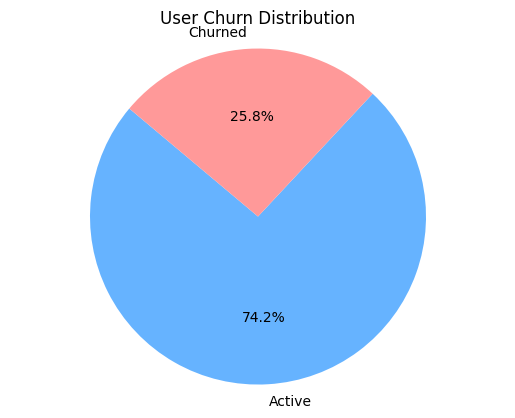

In [13]:
#Draw the pie chart
plt.pie(
    sizes,                   # The sizes of each slice (counts of 0 and 1)
    labels=labels,           # Labels for each slice
    autopct='%1.1f%%',       # Show % with 1 decimal place
    colors=colors,           # Use custom colors defined above
     startangle=140           # Start the first slice at 140 degrees for better alignment
)

plt.title('User Churn Distribution')  # The title shown on top of the pie chart
plt.axis('equal')  # Prevents the pie chart from being an oval

plt.show()

In [14]:
# Step 1: Set the size of the plot
plt.figure(figsize=(8, 5))  # Width=8, Height=5 inches

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

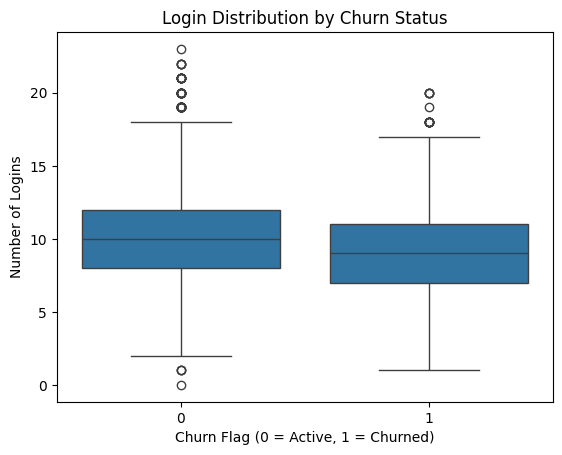

In [17]:
 #Step 2: Create the boxplot
sns.boxplot(x='churn_flag', y='logins', data=df)
plt.title('Login Distribution by Churn Status')  # Chart title
plt.xlabel('Churn Flag (0 = Active, 1 = Churned)')  # X-axis label
plt.ylabel('Number of Logins')  # Y-axis label
plt.show()

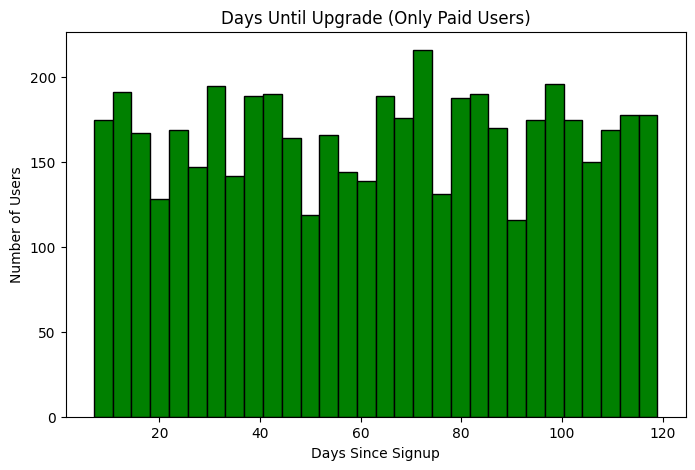

In [34]:
df['signup_date'] = pd.to_datetime(df['signup_date'], dayfirst=True)
df['upgrade_date'] = pd.to_datetime(df['upgrade_date'], errors='coerce', dayfirst=True)
df['days_to_upgrade'] = (df['upgrade_date'] - df['signup_date']).dt.days
# Remove NaN for users who didn’t upgrade
df_upgrade = df[df['days_to_upgrade'].notnull()]# We only want users who actually upgraded

# Set the size of the chart
plt.figure(figsize=(8, 5))  # Chart size: 8 inches by 5 inches
#  Plot the histogram
plt.hist(
    df_upgrade['days_to_upgrade'],  # Data column to plot
    bins=30,                        # Split into 30 equal-width ranges
    color='green',                 # Chart color
    edgecolor='black'              # Outline color for the bars
)  
#  Add labels and title
plt.title('Days Until Upgrade (Only Paid Users)')  # Chart title
plt.xlabel('Days Since Signup')                    # X-axis label
plt.ylabel('Number of Users')                      # Y-axis label
df_upgrade['days_to_upgrade'].mean()
df_upgrade['days_to_upgrade'].median()
#  Show the chart
plt.show()

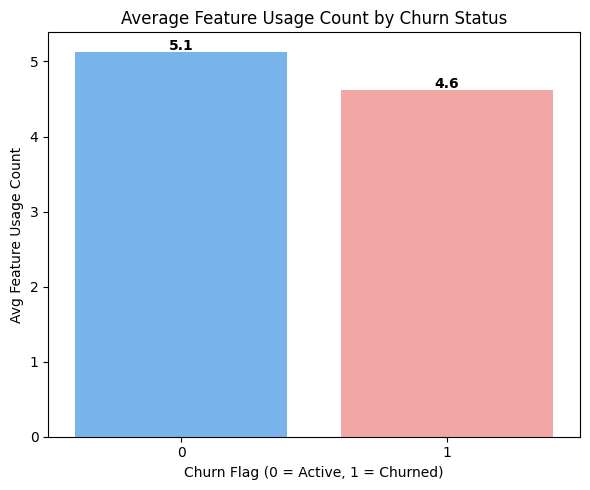

In [45]:


#  Group by churn_flag and calculate average feature usage
usage_comparison = df.groupby('churn_flag')['feature_usage_count'].mean().reset_index()

#  Plot using hue and legend=False (as per seaborn warning fix)
plt.figure(figsize=(6, 5))

sns.barplot(
    data=usage_comparison,
    x='churn_flag',
    y='feature_usage_count',
    hue='churn_flag',
    palette=['#66b3ff', '#ff9999'],
    dodge=False,      # Single bars, no offset
    legend=False      # We don’t need a legend for 2 bars
)

#  Add chart labels
plt.title('Average Feature Usage Count by Churn Status')
plt.xlabel('Churn Flag (0 = Active, 1 = Churned)')
plt.ylabel('Avg Feature Usage Count')

#  Show the values on top of each bar
for i, value in enumerate(usage_comparison['feature_usage_count']):
    plt.text(i, value + 0.015, f'{value:.1f}', ha='center', fontweight='bold')

# Show the chart
plt.tight_layout()
plt.show()


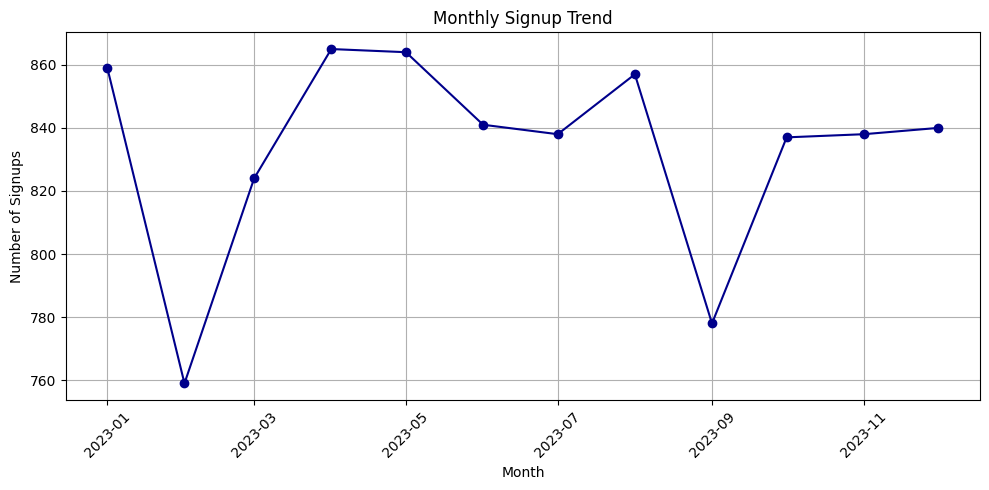

In [48]:

#*Line Chart of Signup Trend*

#  Convert signup_date to datetime (if not already done)
df['signup_date'] = pd.to_datetime(df['signup_date'], dayfirst=True)

#  Create a new column for the month of signup (can also do 'W' for weekly)
df['signup_month'] = df['signup_date'].dt.to_period('M').dt.to_timestamp()

#  Count number of signups per month
signup_counts = df.groupby('signup_month').size().reset_index(name='num_signups')

#  Plot the line chart
plt.figure(figsize=(10, 5))

plt.plot(signup_counts['signup_month'], signup_counts['num_signups'], marker='o', color='darkblue')

#  Add chart labels and title
plt.title('Monthly Signup Trend')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.xticks(rotation=45)

#  Show the chart
plt.tight_layout()
plt.show()


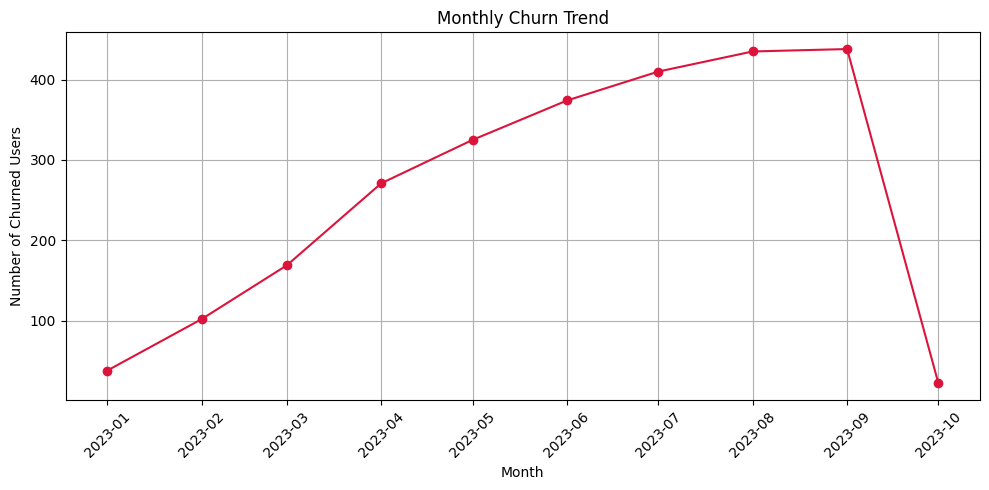

In [49]:
#Churn Over Time (Line Chart)


# Make sure last_login_date is in datetime format
df['last_login_date'] = pd.to_datetime(df['last_login_date'], dayfirst=True)

#  Create new column for the churn month (based on last login)
df['churn_month'] = df['last_login_date'].dt.to_period('M').dt.to_timestamp()

#  Filter churned users only (churn_flag == 1)
churned_df = df[df['churn_flag'] == 1]

#  Count number of churns per month
churn_counts = churned_df.groupby('churn_month').size().reset_index(name='num_churns')

#  Plot the churn trend
plt.figure(figsize=(10, 5))

plt.plot(churn_counts['churn_month'], churn_counts['num_churns'], marker='o', color='crimson')

#  Add chart labels
plt.title('Monthly Churn Trend')
plt.xlabel('Month')
plt.ylabel('Number of Churned Users')
plt.grid(True)
plt.xticks(rotation=45)

#  Show the chart
plt.tight_layout()
plt.show()


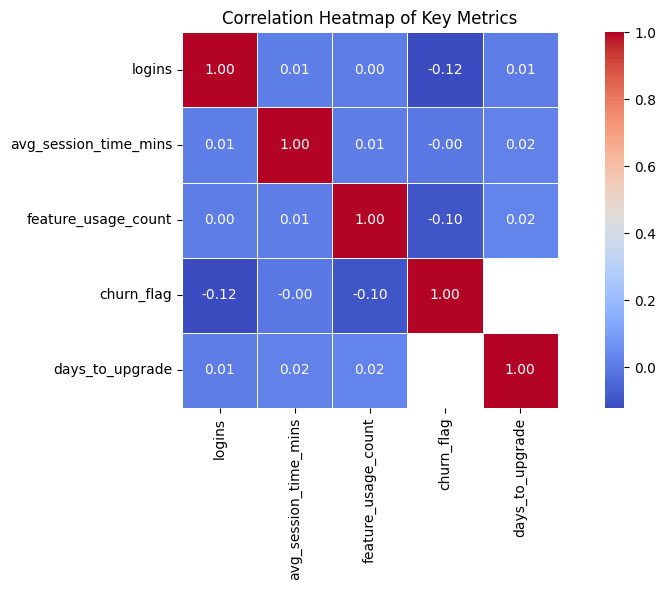

In [50]:
#heatmap correlation


#  Select only numeric columns for correlation
num_cols = ['logins', 'avg_session_time_mins', 'feature_usage_count', 'churn_flag', 'days_to_upgrade']

#  Calculate the correlation matrix
corr_matrix = df[num_cols].corr()

#  Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix, 
    annot=True,             # Show numbers in boxes
    cmap='coolwarm',        # Blue = negative, Red = positive
    fmt=".2f",              # 2 decimal places
    linewidths=0.5,         # Thin lines between boxes
    square=True             # Make each box square
)

#  Add title
plt.title('Correlation Heatmap of Key Metrics')

#  Show it
plt.tight_layout()
plt.show()


user_segment
Regular User    7176
Churned         2455
Inactive         362
Power User         7
Name: count, dtype: int64


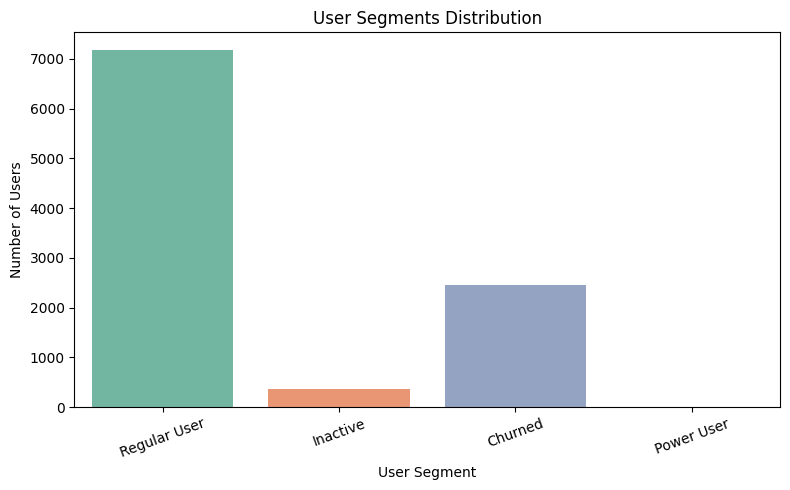

In [54]:
# Define segments based on login frequency and session time
def segment_user(row):
    if row['logins'] > 20 and row['avg_session_time_mins'] > 15:
        return 'Power User'
    elif row['feature_usage_count'] == 0 or row['logins'] < 5:
        return 'Inactive'
    elif row['churn_flag'] == 1:
        return 'Churned'
    elif row['days_to_upgrade'] < 7:
        return 'Quick Upgrader'
    else:
        return 'Regular User'

# Apply the function to each row
df['user_segment'] = df.apply(segment_user, axis=1)

# Count how many users in each segment
print(df['user_segment'].value_counts())
# Fixes the Seaborn future warning about palette usage
plt.figure(figsize=(8, 5))

sns.countplot(
    data=df,
    x='user_segment',
    hue='user_segment',             # Assign hue to match the x
    palette='Set2',                 # Pretty categorical colors
    legend=False                    # No need for extra legend (x-axis already shows segments)
)

plt.title('User Segments Distribution')
plt.xlabel('User Segment')
plt.ylabel('Number of Users')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()



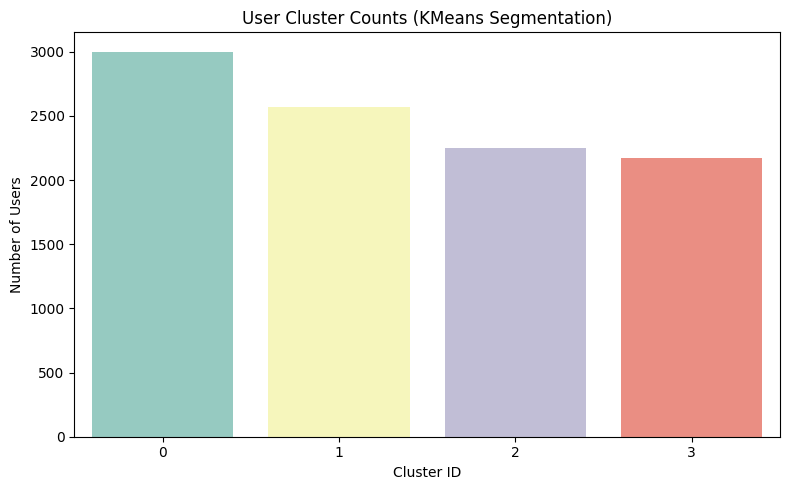

         logins  avg_session_time_mins  feature_usage_count  days_to_upgrade
cluster                                                                     
0          7.57                  15.01                 3.64            33.80
1         10.68                  15.14                 5.21            89.30
2         13.32                  15.02                 4.00            35.07
3          9.21                  14.84                 7.67            39.10


In [62]:
#KMeans Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select behavioral features to use for clustering
features = df[['logins', 'avg_session_time_mins', 'feature_usage_count', 'days_to_upgrade']]

# Fill missing values (if any)
features = features.fillna(0)

# Standardize features (important for KMeans)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Create KMeans model (try 4 clusters to start)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.countplot(
    data=df,
    x='cluster',
    hue='cluster',             # Assign hue same as x
    palette='Set3',            #  Keeps colorful palette
    legend=False               #  Prevents duplicate legend
)

plt.title('User Cluster Counts (KMeans Segmentation)')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()
cluster_summary = df.groupby('cluster')[
    ['logins','avg_session_time_mins', 'feature_usage_count', 'days_to_upgrade']
].mean().round(2)

print(cluster_summary)


In [59]:
df['cluster'].value_counts()

cluster
0    3002
1    2571
2    2253
3    2174
Name: count, dtype: int64

In [65]:
df.to_csv("saas_user_data_final.csv", index=False)
